In [38]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pdpipe as pdp
import geopandas as gpd
import descartes

from shapely.geometry import Point, Polygon, MultiPolygon

In [39]:
name_main = "Data/demographics"

original_nta = pd.read_csv(name_main+".csv")
nta = original_nta
nta.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Bath Beach,Brooklyn,BK27,33163,2210,1826,1922,1657,1726,2850,...,1223,927,1290,2074,1352,1758,706,585,58243.0,75950.0
1,Bay Ridge,Brooklyn,BK31,79134,5166,4513,3379,3551,4347,6827,...,3235,3047,3542,5570,4108,4827,2497,2775,63539.0,86319.0
2,Bedford,Brooklyn,BK75,75318,7480,6580,5378,4635,6479,8683,...,3385,2509,3124,3706,2269,2847,1195,1034,39970.0,62616.0
3,Bensonhurst East,Brooklyn,BK29,64267,4151,3563,2891,3470,4182,4939,...,2718,2185,2655,3898,2558,2416,1144,844,48097.0,65715.0
4,Bensonhurst West,Brooklyn,BK28,91646,6498,5162,4529,4648,5793,8036,...,3383,3246,4036,5117,3428,3743,1649,1231,51035.0,70198.0


In [40]:
nta.set_index("nta_code", inplace=True)

pipe = pdp.ColDrop("nta_name")

'''
all nta boroughs (guess): ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island']
'''
nta = pipe(nta)
nta

,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
nta_code,,,,,,,,,,,,,,,,,,,,,
BK27,Brooklyn,33163,2210,1826,1922,1657,1726,2850,2771,2442,...,1223,927,1290,2074,1352,1758,706,585,58243.0,75950.0
BK31,Brooklyn,79134,5166,4513,3379,3551,4347,6827,6876,5459,...,3235,3047,3542,5570,4108,4827,2497,2775,63539.0,86319.0
BK75,Brooklyn,75318,7480,6580,5378,4635,6479,8683,6984,5586,...,3385,2509,3124,3706,2269,2847,1195,1034,39970.0,62616.0
BK29,Brooklyn,64267,4151,3563,2891,3470,4182,4939,4634,4677,...,2718,2185,2655,3898,2558,2416,1144,844,48097.0,65715.0
BK28,Brooklyn,91646,6498,5162,4529,4648,5793,8036,7766,5917,...,3383,3246,4036,5117,3428,3743,1649,1231,51035.0,70198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BX63,The Bronx,37395,2751,3214,2731,2623,3367,3216,2866,2207,...,2170,1714,1713,1872,849,525,70,100,26520.0,37550.0
BX08,The Bronx,35752,2740,2706,2625,2266,2954,2996,2592,2682,...,1856,1570,1587,1698,932,660,182,35,29306.0,39917.0
BX59,The Bronx,28437,2281,1640,1644,1942,2668,2526,1908,1867,...,1064,994,986,1628,1172,885,217,289,43412.0,57590.0


In [41]:
nta.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'The Bronx'],
      dtype=object)

In [42]:
nta.shape

(195, 30)

In [43]:
name_map = "Data/legend/geographic"

original_nta_map = pd.read_csv(name_map+".csv")
nta_map = original_nta_map
nta_map.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [44]:
outside_codes = set(nta_map.columns).difference(set(nta.index))

pipe_map = pdp.ColDrop(columns=outside_codes)

nta_map = pipe_map(nta_map)
nta_map.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [52]:
polygons = []
for code in list(nta_map.columns):
    lats = list(nta_map[code])[::2]
    longs = list(nta_map[code])[1::2]
    lats = list(filter(lambda n: not(np.isnan(n)), lats))
    longs = list(filter(lambda n: not(np.isnan(n)), longs))
    print(len(lats),len(longs))
    assert len(lats)==len(longs), str(code)+" doesn't have same no. of lats & longs..."
    polygons.append(Polygon([[lats[i],longs[i]] for i in range(len(lats))]))
nta.insert(2,"geometry",polygons,True)

130 130
93 93
189 189
121 121
112 112
163 163
506 506
102 102
115 115
97 97
335 335
82 82
221 221
110 110
101 101
224 224
382 382
214 214
158 158
82 82
151 151
293 293
91 91
134 134
76 76
54 54
67 67
104 104
77 77
3460 3460
80 80
113 113
141 141
467 467
272 272
1799 1799
205 205
328 328
210 210
223 223
159 159
155 155
5 5
101 101
109 109
189 189
205 205
125 125
2414 2414
92 92
276 276
194 194
58 58
9 9
163 163
180 180
99 99
106 106
89 89
693 693
80 80
124 124
155 155
241 241
173 173
148 148
135 135
62 62
66 66
113 113
115 115
147 147
285 285
131 131
67 67
1778 1778
217 217
104 104
212 212
677 677
255 255
148 148
180 180
162 162
147 147
81 81
74 74
194 194
664 664
179 179
176 176
229 229
249 249
147 147
275 275
253 253
166 166
206 206
149 149
528 528
4651 4651
165 165
257 257
192 192
168 168
112 112
148 148
73 73
303 303
168 168
162 162
337 337
1490 1490
246 246
9 9
214 214
130 130
116 116
60 60
123 123
130 130
137 137
527 527
175 175
219 219
164 164
112 112
97 97
98 98
2139 2139
241 24

In [53]:
nta.head()

,borough,population,geometry,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
nta_code,,,,,,,,,,,,,,,,,,,,,
BK27,Brooklyn,33163,"POLYGON ((-73.9760507905698 40.6312841471042, ...",2210,1826,1922,1657,1726,2850,2771,...,1223,927,1290,2074,1352,1758,706,585,58243.0,75950.0
BK31,Brooklyn,79134,"POLYGON ((-73.79493384594591 40.7578063026709,...",5166,4513,3379,3551,4347,6827,6876,...,3235,3047,3542,5570,4108,4827,2497,2775,63539.0,86319.0
BK75,Brooklyn,75318,"POLYGON ((-73.7757397458527 40.7433339175923, ...",7480,6580,5378,4635,6479,8683,6984,...,3385,2509,3124,3706,2269,2847,1195,1034,39970.0,62616.0
BK29,Brooklyn,64267,"POLYGON ((-73.8037916164017 40.7756183875692, ...",4151,3563,2891,3470,4182,4939,4634,...,2718,2185,2655,3898,2558,2416,1144,844,48097.0,65715.0
BK28,Brooklyn,91646,"POLYGON ((-73.86109864852619 40.7636727485249,...",6498,5162,4529,4648,5793,8036,7766,...,3383,3246,4036,5117,3428,3743,1649,1231,51035.0,70198.0


In [54]:
gnta = gpd.GeoDataFrame(nta,geometry=nta.geometry)
gnta.head()

,borough,population,geometry,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
nta_code,,,,,,,,,,,,,,,,,,,,,
BK27,Brooklyn,33163,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",2210,1826,1922,1657,1726,2850,2771,...,1223,927,1290,2074,1352,1758,706,585,58243.0,75950.0
BK31,Brooklyn,79134,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",5166,4513,3379,3551,4347,6827,6876,...,3235,3047,3542,5570,4108,4827,2497,2775,63539.0,86319.0
BK75,Brooklyn,75318,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",7480,6580,5378,4635,6479,8683,6984,...,3385,2509,3124,3706,2269,2847,1195,1034,39970.0,62616.0
BK29,Brooklyn,64267,"POLYGON ((-73.80379 40.77562, -73.80099 40.775...",4151,3563,2891,3470,4182,4939,4634,...,2718,2185,2655,3898,2558,2416,1144,844,48097.0,65715.0
BK28,Brooklyn,91646,"POLYGON ((-73.86110 40.76367, -73.85993 40.762...",6498,5162,4529,4648,5793,8036,7766,...,3383,3246,4036,5117,3428,3743,1649,1231,51035.0,70198.0


In [58]:
gnta.to_csv("nta_region.csv")

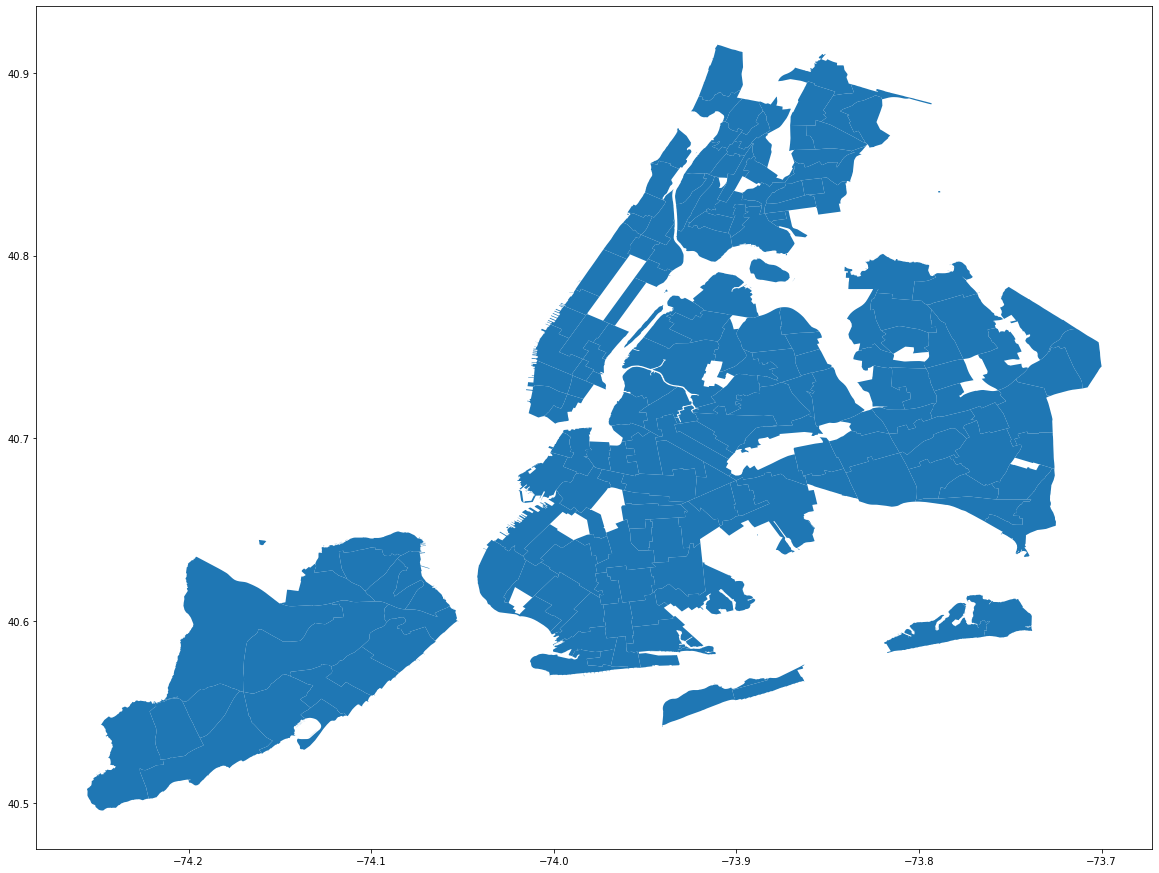

In [56]:
fig,ax = plt.subplots(figsize = (20,20))
gnta.plot(ax=ax)

In [59]:
gnta.shape

(195, 31)